In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 100
generations = int(1500/necoc)
generations

15

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

42


In [7]:
len(number_codes[0])

100

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:1293
number of class2:324

 ****** Running generation 0 ****** 

Population's average fitness: 0.44309 stdev: 0.21369
Best fitness: 0.87137 - size: (2, 13) - species 4 - id 111
Average adjusted fitness: 0.304
Mean genetic distance 2.858, standard deviation 0.479
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 15.427 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60506 stdev: 0.21278
Best fitness: 0.87755 - size: (3, 15) - species 4 - id 381
Average adjusted fitness: 0.452
Mean genetic distance 2.915, standard deviation 0.494
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 22.448 sec (18.938 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61910 stdev: 0.21473
Best fitness: 0.88312 - size: (3, 16) - species 4 - id 548
Average adjusted fitness: 0.462
Mean genetic distance 2.979, standard deviation 0.468
Population of 201 members in 27 species
Total extin

Population's average fitness: 0.61227 stdev: 0.08053
Best fitness: 0.81694 - size: (3, 16) - species 23 - id 961
Average adjusted fitness: 0.213
Mean genetic distance 3.140, standard deviation 0.502
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 30.261 sec (26.208 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61124 stdev: 0.08496
Best fitness: 0.81694 - size: (3, 16) - species 23 - id 961
Average adjusted fitness: 0.252
Mean genetic distance 3.159, standard deviation 0.513
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 31.006 sec (27.182 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61809 stdev: 0.08345
Best fitness: 0.81694 - size: (3, 16) - species 23 - id 961
Average adjusted fitness: 0.243
Mean genetic distance 3.169, standard deviation 0.513
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 27.759 sec (27.753 average)

 ***

Population's average fitness: 0.57813 stdev: 0.08790
Best fitness: 0.74706 - size: (3, 14) - species 14 - id 490
Average adjusted fitness: 0.251
Mean genetic distance 3.161, standard deviation 0.512
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 22.554 sec (23.190 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58149 stdev: 0.09671
Best fitness: 0.74706 - size: (3, 14) - species 14 - id 490
Average adjusted fitness: 0.316
Mean genetic distance 3.199, standard deviation 0.522
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 26.855 sec (23.923 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58404 stdev: 0.09654
Best fitness: 0.76005 - size: (5, 18) - species 10 - id 943
Average adjusted fitness: 0.275
Mean genetic distance 3.181, standard deviation 0.506
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 41.754 sec (26.895 average)

 *****

Population's average fitness: 0.72294 stdev: 0.18077
Best fitness: 0.93816 - size: (4, 17) - species 37 - id 693
Average adjusted fitness: 0.567
Mean genetic distance 3.204, standard deviation 0.477
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 22.541 sec (21.611 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.73127 stdev: 0.17027
Best fitness: 0.93816 - size: (4, 17) - species 37 - id 693
Average adjusted fitness: 0.581
Mean genetic distance 3.213, standard deviation 0.475
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 22.657 sec (21.828 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.72662 stdev: 0.17171
Best fitness: 0.93816 - size: (4, 17) - species 37 - id 693
Average adjusted fitness: 0.574
Mean genetic distance 3.214, standard deviation 0.475
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 23.540 sec (22.042 average)
numbe

Population's average fitness: 0.67441 stdev: 0.11635
Best fitness: 0.81509 - size: (6, 22) - species 1 - id 933
Average adjusted fitness: 0.400
Mean genetic distance 3.097, standard deviation 0.465
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 22.428 sec (20.336 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.67853 stdev: 0.11520
Best fitness: 0.81509 - size: (6, 22) - species 1 - id 933
Average adjusted fitness: 0.369
Mean genetic distance 3.109, standard deviation 0.471
Population of 205 members in 43 species
Total extinctions: 0
Generation time: 22.011 sec (20.546 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.67648 stdev: 0.11302
Best fitness: 0.81509 - size: (6, 22) - species 5 - id 933
Average adjusted fitness: 0.371
Mean genetic distance 3.091, standard deviation 0.477
Population of 204 members in 43 species
Total extinctions: 0
Generation time: 22.830 sec (20.799 average)

 ****** R


 ****** Running generation 0 ****** 

Population's average fitness: 0.52826 stdev: 0.14117
Best fitness: 0.78355 - size: (2, 13) - species 6 - id 67
Average adjusted fitness: 0.377
Mean genetic distance 2.939, standard deviation 0.524
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 17.419 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60693 stdev: 0.13784
Best fitness: 0.86951 - size: (2, 14) - species 5 - id 263
Average adjusted fitness: 0.305
Mean genetic distance 3.036, standard deviation 0.498
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 18.231 sec (17.825 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62902 stdev: 0.12758
Best fitness: 0.86951 - size: (2, 14) - species 5 - id 263
Average adjusted fitness: 0.323
Mean genetic distance 3.098, standard deviation 0.477
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 19.802 sec (18.48

Population's average fitness: 0.77012 stdev: 0.23602
Best fitness: 0.95918 - size: (7, 25) - species 27 - id 1510
Average adjusted fitness: 0.669
Mean genetic distance 3.090, standard deviation 0.505
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 20.896 sec (20.257 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.77969 stdev: 0.23846
Best fitness: 0.95918 - size: (7, 25) - species 27 - id 1510
Average adjusted fitness: 0.684
Mean genetic distance 3.071, standard deviation 0.500
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 21.696 sec (20.710 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.77584 stdev: 0.24173
Best fitness: 0.95918 - size: (7, 25) - species 27 - id 1510
Average adjusted fitness: 0.678
Mean genetic distance 3.079, standard deviation 0.503
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 22.563 sec (21.081 average)

 

Population's average fitness: 0.58393 stdev: 0.09811
Best fitness: 0.82622 - size: (3, 14) - species 24 - id 680
Average adjusted fitness: 0.209
Mean genetic distance 3.101, standard deviation 0.499
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 20.330 sec (18.870 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58533 stdev: 0.10541
Best fitness: 0.82622 - size: (3, 14) - species 24 - id 680
Average adjusted fitness: 0.291
Mean genetic distance 3.054, standard deviation 0.495
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 19.993 sec (19.095 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58814 stdev: 0.10634
Best fitness: 0.82622 - size: (3, 14) - species 24 - id 680
Average adjusted fitness: 0.261
Mean genetic distance 3.063, standard deviation 0.513
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 20.719 sec (19.365 average)

 *****

Population's average fitness: 0.69005 stdev: 0.10603
Best fitness: 0.80829 - size: (6, 19) - species 21 - id 1407
Average adjusted fitness: 0.401
Mean genetic distance 3.234, standard deviation 0.472
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 23.591 sec (22.059 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.68914 stdev: 0.11754
Best fitness: 0.81694 - size: (6, 20) - species 26 - id 1919
Average adjusted fitness: 0.501
Mean genetic distance 3.222, standard deviation 0.470
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 23.603 sec (22.410 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.68985 stdev: 0.11535
Best fitness: 0.81694 - size: (6, 20) - species 26 - id 1919
Average adjusted fitness: 0.464
Mean genetic distance 3.231, standard deviation 0.475
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 23.273 sec (22.665 average)
nu

Population's average fitness: 0.65848 stdev: 0.14604
Best fitness: 0.82684 - size: (3, 15) - species 5 - id 899
Average adjusted fitness: 0.476
Mean genetic distance 3.097, standard deviation 0.509
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 20.926 sec (19.370 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.66768 stdev: 0.14412
Best fitness: 0.83550 - size: (4, 16) - species 4 - id 1268
Average adjusted fitness: 0.372
Mean genetic distance 3.125, standard deviation 0.501
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 21.237 sec (19.603 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.66895 stdev: 0.14175
Best fitness: 0.83550 - size: (4, 16) - species 4 - id 1268
Average adjusted fitness: 0.398
Mean genetic distance 3.164, standard deviation 0.511
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 22.693 sec (19.947 average)

 ******


 ****** Running generation 0 ****** 

Population's average fitness: 0.49778 stdev: 0.06089
Best fitness: 0.73098 - size: (2, 13) - species 3 - id 16
Average adjusted fitness: 0.213
Mean genetic distance 2.894, standard deviation 0.473
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 17.156 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52888 stdev: 0.06350
Best fitness: 0.75758 - size: (3, 15) - species 2 - id 323
Average adjusted fitness: 0.154
Mean genetic distance 2.988, standard deviation 0.497
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 18.515 sec (17.835 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55254 stdev: 0.07501
Best fitness: 0.75758 - size: (3, 15) - species 2 - id 323
Average adjusted fitness: 0.158
Mean genetic distance 3.102, standard deviation 0.502
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 19.288 sec (18.32

Population's average fitness: 0.69256 stdev: 0.18886
Best fitness: 0.88992 - size: (4, 15) - species 30 - id 1238
Average adjusted fitness: 0.466
Mean genetic distance 3.124, standard deviation 0.472
Population of 208 members in 38 species
Total extinctions: 0
Generation time: 22.370 sec (20.807 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.68975 stdev: 0.19202
Best fitness: 0.89116 - size: (7, 23) - species 18 - id 1610
Average adjusted fitness: 0.470
Mean genetic distance 3.118, standard deviation 0.487
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 23.337 sec (21.430 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.70095 stdev: 0.18508
Best fitness: 0.89116 - size: (7, 23) - species 18 - id 1610
Average adjusted fitness: 0.479
Mean genetic distance 3.101, standard deviation 0.485
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 23.090 sec (21.882 average)

 

Population's average fitness: 0.54660 stdev: 0.06218
Best fitness: 0.70686 - size: (2, 13) - species 32 - id 312
Average adjusted fitness: 0.207
Mean genetic distance 3.144, standard deviation 0.525
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 20.273 sec (18.824 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55456 stdev: 0.06210
Best fitness: 0.70686 - size: (2, 13) - species 32 - id 312
Average adjusted fitness: 0.192
Mean genetic distance 3.129, standard deviation 0.518
Population of 211 members in 37 species
Total extinctions: 0
Generation time: 20.514 sec (19.162 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55535 stdev: 0.06572
Best fitness: 0.70686 - size: (2, 13) - species 32 - id 312
Average adjusted fitness: 0.199
Mean genetic distance 3.153, standard deviation 0.516
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 21.948 sec (19.626 average)

 *****

Population's average fitness: 0.78881 stdev: 0.22379
Best fitness: 0.93259 - size: (4, 20) - species 9 - id 1264
Average adjusted fitness: 0.662
Mean genetic distance 3.162, standard deviation 0.463
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 23.373 sec (21.604 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.77971 stdev: 0.23149
Best fitness: 0.93259 - size: (4, 20) - species 9 - id 1264
Average adjusted fitness: 0.664
Mean genetic distance 3.159, standard deviation 0.462
Population of 208 members in 38 species
Total extinctions: 0
Generation time: 22.921 sec (21.884 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.79583 stdev: 0.20232
Best fitness: 0.93259 - size: (4, 20) - species 9 - id 1264
Average adjusted fitness: 0.683
Mean genetic distance 3.164, standard deviation 0.461
Population of 211 members in 38 species
Total extinctions: 0
Generation time: 23.595 sec (22.159 average)
numbe

Population's average fitness: 0.66533 stdev: 0.11727
Best fitness: 0.78973 - size: (3, 15) - species 4 - id 537
Average adjusted fitness: 0.349
Mean genetic distance 3.068, standard deviation 0.497
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 21.250 sec (20.125 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.68047 stdev: 0.10102
Best fitness: 0.78973 - size: (3, 15) - species 4 - id 537
Average adjusted fitness: 0.359
Mean genetic distance 3.058, standard deviation 0.484
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 21.559 sec (20.304 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65109 stdev: 0.13309
Best fitness: 0.78973 - size: (3, 15) - species 4 - id 537
Average adjusted fitness: 0.323
Mean genetic distance 3.064, standard deviation 0.497
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 22.039 sec (20.497 average)

 ****** R


 ****** Running generation 0 ****** 

Population's average fitness: 0.44408 stdev: 0.15156
Best fitness: 0.82560 - size: (2, 13) - species 3 - id 19
Average adjusted fitness: 0.217
Mean genetic distance 2.937, standard deviation 0.451
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 17.729 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54358 stdev: 0.16837
Best fitness: 0.89116 - size: (3, 15) - species 1 - id 292
Average adjusted fitness: 0.293
Mean genetic distance 2.967, standard deviation 0.484
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 18.611 sec (18.170 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59105 stdev: 0.16219
Best fitness: 0.89116 - size: (3, 15) - species 10 - id 292
Average adjusted fitness: 0.374
Mean genetic distance 3.005, standard deviation 0.487
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 19.702 sec (18.6

Population's average fitness: 0.61096 stdev: 0.11386
Best fitness: 0.80210 - size: (5, 18) - species 21 - id 1175
Average adjusted fitness: 0.280
Mean genetic distance 3.083, standard deviation 0.477
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 21.653 sec (20.427 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62127 stdev: 0.10604
Best fitness: 0.81323 - size: (3, 14) - species 3 - id 1543
Average adjusted fitness: 0.274
Mean genetic distance 3.094, standard deviation 0.471
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 21.793 sec (20.802 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62443 stdev: 0.10209
Best fitness: 0.81323 - size: (3, 14) - species 4 - id 1543
Average adjusted fitness: 0.281
Mean genetic distance 3.104, standard deviation 0.479
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 22.881 sec (21.204 average)

 **

Population's average fitness: 0.57146 stdev: 0.08192
Best fitness: 0.75015 - size: (2, 11) - species 19 - id 596
Average adjusted fitness: 0.222
Mean genetic distance 3.075, standard deviation 0.501
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 20.659 sec (18.984 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57238 stdev: 0.08912
Best fitness: 0.75015 - size: (2, 11) - species 19 - id 596
Average adjusted fitness: 0.201
Mean genetic distance 3.151, standard deviation 0.522
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 20.966 sec (19.381 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58547 stdev: 0.08490
Best fitness: 0.75015 - size: (2, 11) - species 19 - id 596
Average adjusted fitness: 0.215
Mean genetic distance 3.205, standard deviation 0.540
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 21.213 sec (19.686 average)

 *****

Population's average fitness: 0.66020 stdev: 0.11774
Best fitness: 0.87446 - size: (6, 19) - species 23 - id 1784
Average adjusted fitness: 0.289
Mean genetic distance 3.196, standard deviation 0.479
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 22.412 sec (21.382 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66326 stdev: 0.10974
Best fitness: 0.87446 - size: (6, 19) - species 23 - id 1784
Average adjusted fitness: 0.277
Mean genetic distance 3.215, standard deviation 0.483
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 22.510 sec (21.664 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65554 stdev: 0.12753
Best fitness: 0.87446 - size: (6, 19) - species 23 - id 1784
Average adjusted fitness: 0.403
Mean genetic distance 3.211, standard deviation 0.483
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 22.909 sec (21.877 average)
nu

Population's average fitness: 0.59723 stdev: 0.08918
Best fitness: 0.77118 - size: (5, 18) - species 2 - id 943
Average adjusted fitness: 0.294
Mean genetic distance 3.176, standard deviation 0.481
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 21.633 sec (19.644 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60061 stdev: 0.09635
Best fitness: 0.79654 - size: (5, 19) - species 2 - id 1215
Average adjusted fitness: 0.353
Mean genetic distance 3.201, standard deviation 0.484
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 22.034 sec (19.943 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60181 stdev: 0.09072
Best fitness: 0.79654 - size: (5, 19) - species 2 - id 1215
Average adjusted fitness: 0.301
Mean genetic distance 3.203, standard deviation 0.472
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 21.356 sec (20.100 average)

 ******


 ****** Running generation 0 ****** 

Population's average fitness: 0.51373 stdev: 0.09914
Best fitness: 0.73036 - size: (2, 13) - species 3 - id 140
Average adjusted fitness: 0.256
Mean genetic distance 2.849, standard deviation 0.486
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 19.067 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56122 stdev: 0.10001
Best fitness: 0.76809 - size: (3, 15) - species 4 - id 261
Average adjusted fitness: 0.364
Mean genetic distance 3.042, standard deviation 0.515
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 18.558 sec (18.813 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59723 stdev: 0.09662
Best fitness: 0.76809 - size: (4, 16) - species 30 - id 517
Average adjusted fitness: 0.386
Mean genetic distance 3.123, standard deviation 0.513
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 19.391 sec (19.

Population's average fitness: 0.63229 stdev: 0.13165
Best fitness: 0.83983 - size: (6, 22) - species 7 - id 1229
Average adjusted fitness: 0.332
Mean genetic distance 3.110, standard deviation 0.522
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 22.086 sec (20.143 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65616 stdev: 0.10728
Best fitness: 0.83983 - size: (6, 22) - species 7 - id 1229
Average adjusted fitness: 0.360
Mean genetic distance 3.133, standard deviation 0.521
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 22.313 sec (20.649 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63891 stdev: 0.13243
Best fitness: 0.83983 - size: (6, 22) - species 7 - id 1229
Average adjusted fitness: 0.329
Mean genetic distance 3.144, standard deviation 0.515
Population of 209 members in 35 species
Total extinctions: 0
Generation time: 22.101 sec (21.013 average)

 ***

Population's average fitness: 0.55912 stdev: 0.06890
Best fitness: 0.70872 - size: (2, 14) - species 2 - id 481
Average adjusted fitness: 0.187
Mean genetic distance 3.030, standard deviation 0.482
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 20.335 sec (19.011 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57201 stdev: 0.07157
Best fitness: 0.70872 - size: (2, 14) - species 2 - id 481
Average adjusted fitness: 0.221
Mean genetic distance 3.004, standard deviation 0.487
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 20.742 sec (19.357 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58503 stdev: 0.06818
Best fitness: 0.73284 - size: (5, 18) - species 4 - id 952
Average adjusted fitness: 0.204
Mean genetic distance 3.036, standard deviation 0.477
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 20.447 sec (19.539 average)

 ****** R

Population's average fitness: 0.65029 stdev: 0.12910
Best fitness: 0.79839 - size: (4, 19) - species 36 - id 1425
Average adjusted fitness: 0.354
Mean genetic distance 3.186, standard deviation 0.452
Population of 206 members in 44 species
Total extinctions: 0
Generation time: 22.999 sec (21.889 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65754 stdev: 0.12238
Best fitness: 0.80334 - size: (3, 14) - species 18 - id 1979
Average adjusted fitness: 0.341
Mean genetic distance 3.186, standard deviation 0.458
Population of 204 members in 46 species
Total extinctions: 0
Generation time: 23.689 sec (22.244 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65508 stdev: 0.13402
Best fitness: 0.80334 - size: (3, 14) - species 18 - id 1979
Average adjusted fitness: 0.349
Mean genetic distance 3.174, standard deviation 0.458
Population of 204 members in 46 species
Total extinctions: 0
Generation time: 23.509 sec (22.504 average)
nu

Population's average fitness: 0.57974 stdev: 0.07544
Best fitness: 0.73779 - size: (7, 23) - species 33 - id 1072
Average adjusted fitness: 0.197
Mean genetic distance 3.062, standard deviation 0.488
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 20.879 sec (19.844 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57394 stdev: 0.08862
Best fitness: 0.73779 - size: (7, 23) - species 33 - id 1072
Average adjusted fitness: 0.261
Mean genetic distance 3.107, standard deviation 0.495
Population of 210 members in 37 species
Total extinctions: 0
Generation time: 21.886 sec (20.099 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58191 stdev: 0.07814
Best fitness: 0.73779 - size: (7, 23) - species 33 - id 1072
Average adjusted fitness: 0.177
Mean genetic distance 3.139, standard deviation 0.514
Population of 209 members in 37 species
Total extinctions: 0
Generation time: 22.344 sec (20.349 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.42978 stdev: 0.20543
Best fitness: 0.80272 - size: (2, 13) - species 4 - id 31
Average adjusted fitness: 0.266
Mean genetic distance 2.887, standard deviation 0.499
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 17.790 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59466 stdev: 0.20777
Best fitness: 0.84725 - size: (3, 15) - species 17 - id 296
Average adjusted fitness: 0.401
Mean genetic distance 3.005, standard deviation 0.507
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 18.535 sec (18.162 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66284 stdev: 0.17575
Best fitness: 0.84725 - size: (3, 15) - species 17 - id 296
Average adjusted fitness: 0.409
Mean genetic distance 3.007, standard deviation 0.523
Population of 204 members in 26 species
Total extinctions: 0
Generation time: 19.718 sec (18.

Population's average fitness: 0.62452 stdev: 0.09033
Best fitness: 0.76809 - size: (5, 20) - species 5 - id 1436
Average adjusted fitness: 0.287
Mean genetic distance 3.128, standard deviation 0.501
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 22.176 sec (20.515 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62850 stdev: 0.08460
Best fitness: 0.76809 - size: (5, 20) - species 5 - id 1436
Average adjusted fitness: 0.292
Mean genetic distance 3.165, standard deviation 0.503
Population of 204 members in 43 species
Total extinctions: 0
Generation time: 21.848 sec (20.962 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62364 stdev: 0.08778
Best fitness: 0.76809 - size: (5, 20) - species 5 - id 1436
Average adjusted fitness: 0.290
Mean genetic distance 3.152, standard deviation 0.504
Population of 204 members in 43 species
Total extinctions: 0
Generation time: 22.542 sec (21.350 average)

 ***

Population's average fitness: 0.64453 stdev: 0.12313
Best fitness: 0.82746 - size: (3, 15) - species 28 - id 519
Average adjusted fitness: 0.349
Mean genetic distance 3.064, standard deviation 0.497
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 20.173 sec (19.072 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65465 stdev: 0.11476
Best fitness: 0.82746 - size: (3, 15) - species 19 - id 519
Average adjusted fitness: 0.359
Mean genetic distance 3.082, standard deviation 0.499
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 20.955 sec (19.449 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.66697 stdev: 0.10806
Best fitness: 0.83364 - size: (4, 17) - species 7 - id 962
Average adjusted fitness: 0.393
Mean genetic distance 3.088, standard deviation 0.503
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 21.367 sec (19.768 average)

 ******

Population's average fitness: 0.65293 stdev: 0.11912
Best fitness: 0.77304 - size: (5, 18) - species 36 - id 1334
Average adjusted fitness: 0.370
Mean genetic distance 3.144, standard deviation 0.476
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 23.004 sec (21.410 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66865 stdev: 0.10130
Best fitness: 0.77304 - size: (5, 18) - species 36 - id 1334
Average adjusted fitness: 0.364
Mean genetic distance 3.121, standard deviation 0.470
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 22.627 sec (21.704 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66085 stdev: 0.11235
Best fitness: 0.78293 - size: (5, 19) - species 9 - id 2040
Average adjusted fitness: 0.389
Mean genetic distance 3.128, standard deviation 0.466
Population of 207 members in 41 species
Total extinctions: 0
Generation time: 23.199 sec (21.937 average)
num

Population's average fitness: 0.59529 stdev: 0.08251
Best fitness: 0.73222 - size: (5, 19) - species 2 - id 941
Average adjusted fitness: 0.205
Mean genetic distance 3.096, standard deviation 0.477
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 20.890 sec (19.855 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60352 stdev: 0.08741
Best fitness: 0.74954 - size: (5, 20) - species 2 - id 1246
Average adjusted fitness: 0.265
Mean genetic distance 3.078, standard deviation 0.482
Population of 191 members in 33 species
Total extinctions: 0
Generation time: 21.516 sec (20.063 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61145 stdev: 0.09068
Best fitness: 0.77118 - size: (4, 16) - species 21 - id 1368
Average adjusted fitness: 0.322
Mean genetic distance 3.071, standard deviation 0.501
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 21.202 sec (20.189 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.47999 stdev: 0.09285
Best fitness: 0.68769 - size: (2, 13) - species 4 - id 126
Average adjusted fitness: 0.198
Mean genetic distance 2.968, standard deviation 0.507
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 17.698 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55046 stdev: 0.08672
Best fitness: 0.72418 - size: (3, 15) - species 4 - id 386
Average adjusted fitness: 0.205
Mean genetic distance 3.059, standard deviation 0.477
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 18.842 sec (18.270 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56428 stdev: 0.09356
Best fitness: 0.73840 - size: (4, 15) - species 28 - id 503
Average adjusted fitness: 0.246
Mean genetic distance 3.102, standard deviation 0.480
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 20.224 sec (18.

Population's average fitness: 0.59541 stdev: 0.07966
Best fitness: 0.75139 - size: (3, 14) - species 3 - id 1263
Average adjusted fitness: 0.235
Mean genetic distance 3.074, standard deviation 0.497
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 23.099 sec (20.642 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59933 stdev: 0.07760
Best fitness: 0.75139 - size: (3, 14) - species 3 - id 1263
Average adjusted fitness: 0.163
Mean genetic distance 3.057, standard deviation 0.501
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 22.697 sec (21.153 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60356 stdev: 0.08186
Best fitness: 0.75139 - size: (3, 14) - species 3 - id 1263
Average adjusted fitness: 0.198
Mean genetic distance 3.048, standard deviation 0.513
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 23.468 sec (21.635 average)

 ***

Population's average fitness: 0.61241 stdev: 0.11726
Best fitness: 0.77180 - size: (3, 15) - species 2 - id 601
Average adjusted fitness: 0.307
Mean genetic distance 3.072, standard deviation 0.495
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 19.961 sec (18.880 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61646 stdev: 0.12627
Best fitness: 0.77242 - size: (3, 16) - species 7 - id 850
Average adjusted fitness: 0.320
Mean genetic distance 3.063, standard deviation 0.486
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 20.923 sec (19.289 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62176 stdev: 0.12162
Best fitness: 0.77242 - size: (3, 16) - species 7 - id 850
Average adjusted fitness: 0.345
Mean genetic distance 3.069, standard deviation 0.467
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 21.276 sec (19.620 average)

 ****** R

Population's average fitness: 0.67801 stdev: 0.13077
Best fitness: 0.84910 - size: (4, 18) - species 35 - id 1912
Average adjusted fitness: 0.411
Mean genetic distance 3.183, standard deviation 0.515
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 22.246 sec (21.567 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67009 stdev: 0.14258
Best fitness: 0.84910 - size: (4, 18) - species 35 - id 1912
Average adjusted fitness: 0.401
Mean genetic distance 3.190, standard deviation 0.508
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 22.737 sec (21.845 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.67213 stdev: 0.14080
Best fitness: 0.84910 - size: (4, 18) - species 35 - id 1912
Average adjusted fitness: 0.373
Mean genetic distance 3.185, standard deviation 0.515
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 22.971 sec (22.083 average)
nu

Population's average fitness: 0.61176 stdev: 0.10888
Best fitness: 0.81447 - size: (4, 15) - species 30 - id 662
Average adjusted fitness: 0.334
Mean genetic distance 3.100, standard deviation 0.482
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 22.047 sec (20.317 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61359 stdev: 0.11659
Best fitness: 0.81447 - size: (4, 15) - species 30 - id 662
Average adjusted fitness: 0.335
Mean genetic distance 3.091, standard deviation 0.479
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 22.020 sec (20.530 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62165 stdev: 0.10927
Best fitness: 0.81447 - size: (4, 15) - species 30 - id 662
Average adjusted fitness: 0.300
Mean genetic distance 3.100, standard deviation 0.494
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 22.249 sec (20.721 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.48110 stdev: 0.08123
Best fitness: 0.67718 - size: (2, 13) - species 8 - id 183
Average adjusted fitness: 0.143
Mean genetic distance 2.877, standard deviation 0.476
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 17.730 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53017 stdev: 0.07926
Best fitness: 0.67718 - size: (2, 13) - species 8 - id 183
Average adjusted fitness: 0.188
Mean genetic distance 2.980, standard deviation 0.499
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 19.016 sec (18.373 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54283 stdev: 0.08009
Best fitness: 0.68213 - size: (3, 16) - species 5 - id 506
Average adjusted fitness: 0.223
Mean genetic distance 3.042, standard deviation 0.520
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 19.183 sec (18.6

Population's average fitness: 0.64123 stdev: 0.13626
Best fitness: 0.80519 - size: (6, 22) - species 34 - id 1233
Average adjusted fitness: 0.357
Mean genetic distance 3.202, standard deviation 0.462
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 22.497 sec (20.963 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64433 stdev: 0.13572
Best fitness: 0.80519 - size: (6, 22) - species 34 - id 1233
Average adjusted fitness: 0.329
Mean genetic distance 3.193, standard deviation 0.464
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 22.803 sec (21.479 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64996 stdev: 0.13428
Best fitness: 0.80519 - size: (6, 22) - species 34 - id 1233
Average adjusted fitness: 0.337
Mean genetic distance 3.182, standard deviation 0.461
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 23.753 sec (21.968 average)

 

Population's average fitness: 0.56712 stdev: 0.07373
Best fitness: 0.73902 - size: (5, 19) - species 9 - id 612
Average adjusted fitness: 0.181
Mean genetic distance 3.105, standard deviation 0.509
Population of 207 members in 32 species
Total extinctions: 0
Generation time: 20.759 sec (19.329 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57512 stdev: 0.07344
Best fitness: 0.73902 - size: (5, 19) - species 9 - id 612
Average adjusted fitness: 0.184
Mean genetic distance 3.161, standard deviation 0.530
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 21.129 sec (19.689 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58184 stdev: 0.07526
Best fitness: 0.73902 - size: (5, 19) - species 9 - id 612
Average adjusted fitness: 0.200
Mean genetic distance 3.143, standard deviation 0.536
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 21.412 sec (19.976 average)

 ****** R

Population's average fitness: 0.65121 stdev: 0.12156
Best fitness: 0.79468 - size: (5, 20) - species 11 - id 757
Average adjusted fitness: 0.365
Mean genetic distance 3.193, standard deviation 0.480
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 23.667 sec (22.256 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63583 stdev: 0.13807
Best fitness: 0.79468 - size: (5, 20) - species 11 - id 757
Average adjusted fitness: 0.324
Mean genetic distance 3.232, standard deviation 0.480
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 23.631 sec (22.630 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65641 stdev: 0.12139
Best fitness: 0.79468 - size: (5, 20) - species 11 - id 757
Average adjusted fitness: 0.360
Mean genetic distance 3.224, standard deviation 0.472
Population of 206 members in 41 species
Total extinctions: 0
Generation time: 23.557 sec (22.917 average)
numbe

Population's average fitness: 0.78378 stdev: 0.20031
Best fitness: 0.92270 - size: (3, 15) - species 8 - id 216
Average adjusted fitness: 0.652
Mean genetic distance 3.112, standard deviation 0.510
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 22.400 sec (20.084 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.78857 stdev: 0.19912
Best fitness: 0.93012 - size: (4, 18) - species 13 - id 1155
Average adjusted fitness: 0.669
Mean genetic distance 3.112, standard deviation 0.503
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 21.032 sec (20.202 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.79882 stdev: 0.19658
Best fitness: 0.95424 - size: (3, 15) - species 4 - id 1241
Average adjusted fitness: 0.684
Mean genetic distance 3.115, standard deviation 0.506
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 23.106 sec (20.525 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.49928 stdev: 0.03997
Best fitness: 0.62152 - size: (2, 13) - species 3 - id 115
Average adjusted fitness: 0.117
Mean genetic distance 2.888, standard deviation 0.475
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 17.173 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51616 stdev: 0.04165
Best fitness: 0.63451 - size: (3, 14) - species 22 - id 367
Average adjusted fitness: 0.171
Mean genetic distance 3.048, standard deviation 0.485
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 18.417 sec (17.795 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52370 stdev: 0.04572
Best fitness: 0.64317 - size: (2, 14) - species 4 - id 527
Average adjusted fitness: 0.133
Mean genetic distance 3.066, standard deviation 0.483
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 18.840 sec (18.

Population's average fitness: 0.62897 stdev: 0.07789
Best fitness: 0.76005 - size: (7, 26) - species 10 - id 1537
Average adjusted fitness: 0.281
Mean genetic distance 3.232, standard deviation 0.486
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 23.108 sec (20.812 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62395 stdev: 0.08549
Best fitness: 0.76005 - size: (7, 26) - species 10 - id 1537
Average adjusted fitness: 0.256
Mean genetic distance 3.223, standard deviation 0.475
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 22.893 sec (21.386 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63719 stdev: 0.08197
Best fitness: 0.78912 - size: (8, 28) - species 10 - id 1822
Average adjusted fitness: 0.250
Mean genetic distance 3.234, standard deviation 0.480
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 23.807 sec (21.915 average)

 

Population's average fitness: 0.73359 stdev: 0.23209
Best fitness: 0.91404 - size: (5, 17) - species 1 - id 556
Average adjusted fitness: 0.638
Mean genetic distance 3.115, standard deviation 0.472
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 20.745 sec (18.899 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.76501 stdev: 0.20278
Best fitness: 0.91775 - size: (6, 18) - species 26 - id 807
Average adjusted fitness: 0.662
Mean genetic distance 3.136, standard deviation 0.468
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 22.120 sec (19.543 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.77517 stdev: 0.20638
Best fitness: 0.91775 - size: (6, 18) - species 26 - id 807
Average adjusted fitness: 0.665
Mean genetic distance 3.149, standard deviation 0.461
Population of 209 members in 39 species
Total extinctions: 0
Generation time: 22.106 sec (19.970 average)

 ******

Population's average fitness: 0.61664 stdev: 0.08869
Best fitness: 0.79221 - size: (7, 25) - species 13 - id 1403
Average adjusted fitness: 0.222
Mean genetic distance 3.195, standard deviation 0.494
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 22.985 sec (21.646 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62169 stdev: 0.09688
Best fitness: 0.79221 - size: (7, 25) - species 13 - id 1403
Average adjusted fitness: 0.249
Mean genetic distance 3.222, standard deviation 0.508
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 22.625 sec (21.896 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62613 stdev: 0.09160
Best fitness: 0.79468 - size: (9, 31) - species 13 - id 2220
Average adjusted fitness: 0.268
Mean genetic distance 3.204, standard deviation 0.490
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 22.484 sec (22.112 average)
nu

Population's average fitness: 0.57809 stdev: 0.07857
Best fitness: 0.71923 - size: (4, 18) - species 22 - id 1121
Average adjusted fitness: 0.209
Mean genetic distance 3.074, standard deviation 0.488
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 20.520 sec (19.291 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58109 stdev: 0.07719
Best fitness: 0.71923 - size: (4, 18) - species 22 - id 1121
Average adjusted fitness: 0.194
Mean genetic distance 3.095, standard deviation 0.499
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 21.268 sec (19.538 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58676 stdev: 0.07871
Best fitness: 0.71923 - size: (4, 18) - species 22 - id 1121
Average adjusted fitness: 0.205
Mean genetic distance 3.135, standard deviation 0.493
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 21.700 sec (19.779 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.49994 stdev: 0.05034
Best fitness: 0.64750 - size: (2, 13) - species 5 - id 113
Average adjusted fitness: 0.121
Mean genetic distance 2.905, standard deviation 0.476
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 17.923 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52505 stdev: 0.05896
Best fitness: 0.66605 - size: (3, 14) - species 13 - id 258
Average adjusted fitness: 0.198
Mean genetic distance 2.966, standard deviation 0.490
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 19.086 sec (18.505 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54539 stdev: 0.05571
Best fitness: 0.66605 - size: (3, 14) - species 13 - id 258
Average adjusted fitness: 0.169
Mean genetic distance 2.988, standard deviation 0.505
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 20.194 sec (19

Population's average fitness: 0.58312 stdev: 0.07040
Best fitness: 0.73531 - size: (4, 18) - species 4 - id 1204
Average adjusted fitness: 0.167
Mean genetic distance 3.117, standard deviation 0.467
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 23.604 sec (20.899 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59187 stdev: 0.06775
Best fitness: 0.73531 - size: (4, 18) - species 4 - id 1204
Average adjusted fitness: 0.142
Mean genetic distance 3.145, standard deviation 0.454
Population of 193 members in 39 species
Total extinctions: 0
Generation time: 23.043 sec (21.420 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59104 stdev: 0.07331
Best fitness: 0.73531 - size: (4, 18) - species 4 - id 1204
Average adjusted fitness: 0.147
Mean genetic distance 3.174, standard deviation 0.462
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 23.047 sec (21.826 average)

 ***

Population's average fitness: 0.68109 stdev: 0.17922
Best fitness: 0.83983 - size: (3, 15) - species 1 - id 663
Average adjusted fitness: 0.466
Mean genetic distance 3.070, standard deviation 0.472
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 20.803 sec (19.345 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.68672 stdev: 0.16821
Best fitness: 0.85220 - size: (3, 15) - species 8 - id 813
Average adjusted fitness: 0.453
Mean genetic distance 3.109, standard deviation 0.470
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 20.368 sec (19.550 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.68532 stdev: 0.18437
Best fitness: 0.85405 - size: (4, 17) - species 4 - id 961
Average adjusted fitness: 0.490
Mean genetic distance 3.095, standard deviation 0.464
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 21.078 sec (19.804 average)

 ****** R

Population's average fitness: 0.63304 stdev: 0.09380
Best fitness: 0.80148 - size: (5, 22) - species 16 - id 1608
Average adjusted fitness: 0.295
Mean genetic distance 3.188, standard deviation 0.491
Population of 205 members in 44 species
Total extinctions: 0
Generation time: 21.812 sec (21.878 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63688 stdev: 0.09264
Best fitness: 0.80148 - size: (5, 22) - species 16 - id 1608
Average adjusted fitness: 0.301
Mean genetic distance 3.188, standard deviation 0.478
Population of 203 members in 44 species
Total extinctions: 0
Generation time: 22.130 sec (22.023 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64293 stdev: 0.09490
Best fitness: 0.80148 - size: (5, 22) - species 16 - id 1608
Average adjusted fitness: 0.307
Mean genetic distance 3.215, standard deviation 0.478
Population of 205 members in 47 species
Total extinctions: 0
Generation time: 22.666 sec (22.242 average)
nu

Population's average fitness: 0.62451 stdev: 0.13501
Best fitness: 0.76685 - size: (5, 17) - species 18 - id 1098
Average adjusted fitness: 0.335
Mean genetic distance 3.148, standard deviation 0.475
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 19.892 sec (18.495 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64027 stdev: 0.12048
Best fitness: 0.76685 - size: (5, 17) - species 18 - id 1098
Average adjusted fitness: 0.349
Mean genetic distance 3.145, standard deviation 0.462
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 19.874 sec (18.667 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63049 stdev: 0.13119
Best fitness: 0.76685 - size: (5, 17) - species 18 - id 1098
Average adjusted fitness: 0.343
Mean genetic distance 3.125, standard deviation 0.461
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 20.361 sec (18.855 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.47851 stdev: 0.08483
Best fitness: 0.64997 - size: (2, 13) - species 5 - id 36
Average adjusted fitness: 0.137
Mean genetic distance 2.808, standard deviation 0.465
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 15.991 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54152 stdev: 0.08654
Best fitness: 0.67347 - size: (3, 15) - species 5 - id 381
Average adjusted fitness: 0.227
Mean genetic distance 2.966, standard deviation 0.487
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 17.066 sec (16.528 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56813 stdev: 0.07647
Best fitness: 0.67532 - size: (4, 17) - species 17 - id 483
Average adjusted fitness: 0.169
Mean genetic distance 2.953, standard deviation 0.487
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 17.839 sec (16.9

Population's average fitness: 0.60977 stdev: 0.09636
Best fitness: 0.76871 - size: (4, 18) - species 13 - id 946
Average adjusted fitness: 0.269
Mean genetic distance 3.249, standard deviation 0.493
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 20.028 sec (18.716 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60629 stdev: 0.09161
Best fitness: 0.77056 - size: (6, 23) - species 18 - id 1606
Average adjusted fitness: 0.269
Mean genetic distance 3.282, standard deviation 0.489
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 20.921 sec (19.195 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60443 stdev: 0.09925
Best fitness: 0.77365 - size: (7, 25) - species 18 - id 1743
Average adjusted fitness: 0.272
Mean genetic distance 3.302, standard deviation 0.500
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 20.545 sec (19.525 average)

 *

Population's average fitness: 0.65412 stdev: 0.11564
Best fitness: 0.79344 - size: (4, 17) - species 10 - id 541
Average adjusted fitness: 0.408
Mean genetic distance 3.113, standard deviation 0.471
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 19.326 sec (17.747 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.66199 stdev: 0.10645
Best fitness: 0.79344 - size: (4, 17) - species 33 - id 541
Average adjusted fitness: 0.382
Mean genetic distance 3.113, standard deviation 0.471
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 18.763 sec (17.950 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.66157 stdev: 0.11493
Best fitness: 0.79344 - size: (4, 17) - species 33 - id 541
Average adjusted fitness: 0.363
Mean genetic distance 3.114, standard deviation 0.481
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 19.458 sec (18.202 average)

 *****

Population's average fitness: 0.59815 stdev: 0.07159
Best fitness: 0.73036 - size: (7, 24) - species 29 - id 1610
Average adjusted fitness: 0.186
Mean genetic distance 3.196, standard deviation 0.457
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 22.266 sec (20.566 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59911 stdev: 0.07304
Best fitness: 0.73036 - size: (7, 24) - species 29 - id 1610
Average adjusted fitness: 0.200
Mean genetic distance 3.173, standard deviation 0.452
Population of 201 members in 45 species
Total extinctions: 0
Generation time: 21.767 sec (20.824 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60284 stdev: 0.07852
Best fitness: 0.73036 - size: (7, 24) - species 29 - id 1610
Average adjusted fitness: 0.230
Mean genetic distance 3.153, standard deviation 0.452
Population of 201 members in 45 species
Total extinctions: 0
Generation time: 21.825 sec (21.086 average)
nu

Population's average fitness: 0.56678 stdev: 0.07098
Best fitness: 0.72480 - size: (5, 20) - species 43 - id 858
Average adjusted fitness: 0.205
Mean genetic distance 3.145, standard deviation 0.451
Population of 196 members in 45 species
Total extinctions: 0
Generation time: 19.276 sec (18.314 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57585 stdev: 0.06814
Best fitness: 0.72913 - size: (4, 18) - species 39 - id 1088
Average adjusted fitness: 0.157
Mean genetic distance 3.171, standard deviation 0.451
Population of 196 members in 46 species
Total extinctions: 0
Generation time: 19.664 sec (18.483 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58180 stdev: 0.06946
Best fitness: 0.72913 - size: (4, 18) - species 39 - id 1088
Average adjusted fitness: 0.185
Mean genetic distance 3.189, standard deviation 0.456
Population of 196 members in 48 species
Total extinctions: 0
Generation time: 19.903 sec (18.641 average)

 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.46729 stdev: 0.13916
Best fitness: 0.70563 - size: (2, 13) - species 2 - id 125
Average adjusted fitness: 0.214
Mean genetic distance 2.860, standard deviation 0.467
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 16.182 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56365 stdev: 0.13363
Best fitness: 0.73840 - size: (2, 14) - species 6 - id 243
Average adjusted fitness: 0.256
Mean genetic distance 2.993, standard deviation 0.457
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 17.192 sec (16.687 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60346 stdev: 0.12901
Best fitness: 0.73840 - size: (2, 14) - species 6 - id 243
Average adjusted fitness: 0.330
Mean genetic distance 3.009, standard deviation 0.467
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 17.695 sec (17.0

Population's average fitness: 0.65016 stdev: 0.12466
Best fitness: 0.77984 - size: (4, 17) - species 28 - id 935
Average adjusted fitness: 0.351
Mean genetic distance 3.220, standard deviation 0.478
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 22.408 sec (19.496 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.66331 stdev: 0.10761
Best fitness: 0.77984 - size: (4, 17) - species 28 - id 935
Average adjusted fitness: 0.357
Mean genetic distance 3.212, standard deviation 0.474
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 21.355 sec (20.028 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65539 stdev: 0.12389
Best fitness: 0.77984 - size: (4, 17) - species 28 - id 935
Average adjusted fitness: 0.392
Mean genetic distance 3.198, standard deviation 0.477
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 21.499 sec (20.433 average)

 ***

Population's average fitness: 0.55837 stdev: 0.09574
Best fitness: 0.74892 - size: (3, 16) - species 18 - id 512
Average adjusted fitness: 0.218
Mean genetic distance 2.971, standard deviation 0.498
Population of 204 members in 22 species
Total extinctions: 0
Generation time: 17.084 sec (15.848 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57706 stdev: 0.08889
Best fitness: 0.74892 - size: (3, 16) - species 18 - id 512
Average adjusted fitness: 0.283
Mean genetic distance 3.000, standard deviation 0.499
Population of 204 members in 22 species
Total extinctions: 0
Generation time: 17.152 sec (16.109 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57417 stdev: 0.09344
Best fitness: 0.74892 - size: (3, 16) - species 18 - id 512
Average adjusted fitness: 0.209
Mean genetic distance 3.046, standard deviation 0.495
Population of 204 members in 24 species
Total extinctions: 0
Generation time: 17.251 sec (16.299 average)

 *****

Population's average fitness: 0.67931 stdev: 0.13827
Best fitness: 0.90291 - size: (6, 21) - species 7 - id 1706
Average adjusted fitness: 0.372
Mean genetic distance 3.109, standard deviation 0.480
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 18.607 sec (17.698 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66779 stdev: 0.15469
Best fitness: 0.90291 - size: (6, 21) - species 7 - id 1706
Average adjusted fitness: 0.462
Mean genetic distance 3.140, standard deviation 0.488
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 18.609 sec (17.923 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.69404 stdev: 0.12994
Best fitness: 0.90291 - size: (6, 21) - species 7 - id 1706
Average adjusted fitness: 0.431
Mean genetic distance 3.164, standard deviation 0.486
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 18.645 sec (18.112 average)
numbe

Population's average fitness: 0.62419 stdev: 0.14428
Best fitness: 0.80891 - size: (2, 14) - species 15 - id 1092
Average adjusted fitness: 0.323
Mean genetic distance 3.112, standard deviation 0.525
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 17.605 sec (16.255 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63716 stdev: 0.13187
Best fitness: 0.80891 - size: (2, 14) - species 15 - id 1092
Average adjusted fitness: 0.322
Mean genetic distance 3.140, standard deviation 0.529
Population of 209 members in 37 species
Total extinctions: 0
Generation time: 17.375 sec (16.395 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63823 stdev: 0.13399
Best fitness: 0.80891 - size: (2, 14) - species 15 - id 1092
Average adjusted fitness: 0.322
Mean genetic distance 3.115, standard deviation 0.534
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 18.091 sec (16.584 average)

 **

Population's average fitness: 0.50441 stdev: 0.06581
Best fitness: 0.74892 - size: (2, 13) - species 2 - id 48
Average adjusted fitness: 0.202
Mean genetic distance 2.944, standard deviation 0.547
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 14.218 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53270 stdev: 0.07190
Best fitness: 0.74892 - size: (2, 13) - species 2 - id 48
Average adjusted fitness: 0.189
Mean genetic distance 3.017, standard deviation 0.521
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 15.009 sec (14.613 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56219 stdev: 0.08623
Best fitness: 0.75387 - size: (4, 16) - species 17 - id 463
Average adjusted fitness: 0.220
Mean genetic distance 3.049, standard deviation 0.493
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 15.960 sec (15.062 average)

 ****** Running generation 

Population's average fitness: 0.60384 stdev: 0.09411
Best fitness: 0.81694 - size: (3, 16) - species 3 - id 1427
Average adjusted fitness: 0.280
Mean genetic distance 3.115, standard deviation 0.487
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 19.018 sec (16.667 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61549 stdev: 0.08979
Best fitness: 0.81694 - size: (3, 16) - species 3 - id 1427
Average adjusted fitness: 0.185
Mean genetic distance 3.133, standard deviation 0.488
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 18.518 sec (17.091 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61973 stdev: 0.09745
Best fitness: 0.82437 - size: (4, 17) - species 3 - id 1840
Average adjusted fitness: 0.298
Mean genetic distance 3.151, standard deviation 0.484
Population of 191 members in 36 species
Total extinctions: 0
Generation time: 17.981 sec (17.402 average)

 ***

Population's average fitness: 0.55020 stdev: 0.06338
Best fitness: 0.70377 - size: (2, 13) - species 24 - id 149
Average adjusted fitness: 0.154
Mean genetic distance 3.109, standard deviation 0.464
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 16.262 sec (15.268 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55870 stdev: 0.06543
Best fitness: 0.71305 - size: (4, 17) - species 8 - id 737
Average adjusted fitness: 0.186
Mean genetic distance 3.105, standard deviation 0.461
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 17.043 sec (15.623 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56921 stdev: 0.06892
Best fitness: 0.71305 - size: (4, 17) - species 8 - id 737
Average adjusted fitness: 0.172
Mean genetic distance 3.096, standard deviation 0.479
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 16.989 sec (15.851 average)

 ****** 

In [9]:
len(winner_list)

100

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8055555555555556

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0]
 [ 0  3 17  0  0  0  0  0  1  0]
 [ 0  0  0 11  0  0  0  0  0  1]
 [ 0  7  0  0 18  0  0  1  0  0]
 [ 0  0  0  3  0 18  0  0  2  1]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  1  0  1  1  0  0 18  1  2]
 [ 0  6  0  3  1  0  0  0 13  0]
 [ 0  0  0  0  0  0  0  0  0 14]]


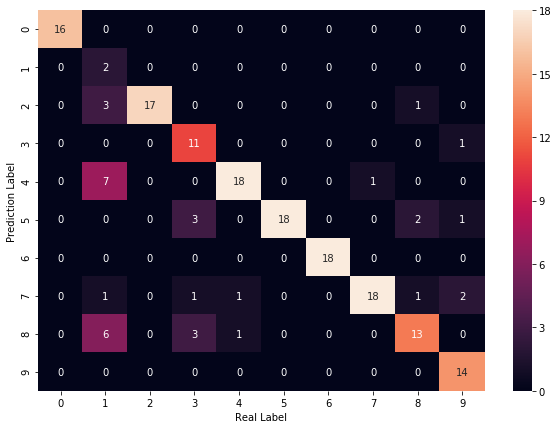

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:27 index:[5] real:5
#1 min_error:27 index:[2] real:2
#2 min_error:26 index:[8] real:8
#3 min_error:8 index:[0] real:0
#4 min_error:27 index:[4] real:1
#5 min_error:17 index:[7] real:7
#6 min_error:14 index:[6] real:6
#7 min_error:20 index:[3] real:3
#8 min_error:11 index:[2] real:2
#9 min_error:31 index:[4] real:1
#10 min_error:28 index:[7] real:7
#11 min_error:29 index:[7] real:4
#12 min_error:12 index:[6] real:6
#13 min_error:25 index:[3] real:3
#14 min_error:28 index:[4] real:1
#15 min_error:27 index:[5] real:3
#16 min_error:28 index:[7] real:9
#17 min_error:29 index:[4] real:1
#18 min_error:27 index:[7] real:7
#19 min_error:10 index:[6] real:6
#20 min_error:22 index:[8] real:8
#21 min_error:15 index:[4] real:4
#22 min_error:19 index:[3] real:3
#23 min_error:28 index:[4] real:1
#24 min_error:16 index:[4] real:4
#25 min_error:11 index:[0] real:0
#26 min_error:15 index:[5] real:5
#27 min_error:17 index:[3] real:3
#28 min_error:33 index:[6] real:6
#29 min_error:26 index:[9

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8503401360544217
Avg Base Learner:0.8027705627705628


In [17]:
from random import randint

list_acc = []

for iii in range(necoc):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.1
Accuracy on training set: 0.14444444444444443
Accuracy on training set: 0.2722222222222222
Accuracy on training set: 0.2722222222222222
Accuracy on training set: 0.35555555555555557
Accuracy on training set: 0.4444444444444444
Accuracy on training set: 0.5222222222222223
Accuracy on training set: 0.5277777777777778
Accuracy on training set: 0.5722222222222222
Accuracy on training set: 0.5944444444444444
Accuracy on training set: 0.6333333333333333
Accuracy on training set: 0.6555555555555556
Accuracy on training set: 0.6777777777777778
Accuracy on training set: 0.6611111111111111
Accuracy on training set: 0.6666666666666666
Accuracy on training set: 0.6611111111111111
Accuracy on training set: 0.7055555555555556
Accuracy on training set: 0.6888888888888889
Accuracy on training set: 0.6944444444444444
Accuracy on training set: 0.7
Accuracy on training set: 0.6888888888888889
Accuracy on training set: 0.7333333333333333
Accuracy on training set: 0.7277777777

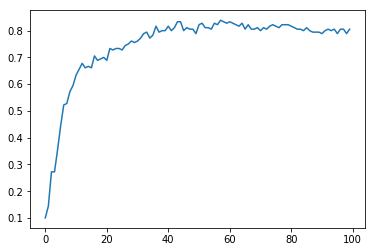

In [18]:
plt.plot(range(necoc),list_acc)
plt.show()

In [19]:
list_acc

[0.1,
 0.14444444444444443,
 0.2722222222222222,
 0.2722222222222222,
 0.35555555555555557,
 0.4444444444444444,
 0.5222222222222223,
 0.5277777777777778,
 0.5722222222222222,
 0.5944444444444444,
 0.6333333333333333,
 0.6555555555555556,
 0.6777777777777778,
 0.6611111111111111,
 0.6666666666666666,
 0.6611111111111111,
 0.7055555555555556,
 0.6888888888888889,
 0.6944444444444444,
 0.7,
 0.6888888888888889,
 0.7333333333333333,
 0.7277777777777777,
 0.7333333333333333,
 0.7333333333333333,
 0.7277777777777777,
 0.7444444444444445,
 0.75,
 0.7611111111111111,
 0.7555555555555555,
 0.7611111111111111,
 0.7722222222222223,
 0.7888888888888889,
 0.7944444444444444,
 0.7722222222222223,
 0.7833333333333333,
 0.8166666666666667,
 0.7944444444444444,
 0.8,
 0.8,
 0.8166666666666667,
 0.8,
 0.8111111111111111,
 0.8333333333333334,
 0.8333333333333334,
 0.8,
 0.8111111111111111,
 0.8055555555555556,
 0.8055555555555556,
 0.7888888888888889,
 0.8222222222222222,
 0.8277777777777777,
 0.8111111